In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)

In [6]:
markets = pd.read_csv('.//markets_cleaned.csv', index_col=0)
markets.head()

,name,city,county,state,lat,lon,months_open,Bakedgoods,Beans,Cheese,...,Prepared,Seafood,Soap,Tofu,Trees,Vegetables,WildHarvested,Wine,num_items_sold,state_pop
0,Island Market,Key Largo,Monroe,Florida,-80.427218,25.109214,6,1,1,1,...,1,1,1,0,0,1,0,0,18,19893297.0
1,COFFO Harvest Farmers' Market,Florida City,Miami-Dade,Florida,-80.482299,25.449850,12,0,0,0,...,1,0,0,0,1,1,0,0,7,19893297.0
2,COFFO Harvest Farmers' Market,Homestead,Miami-Dade,Florida,-80.483400,25.463500,12,0,0,0,...,1,0,0,0,1,1,0,0,7,19893297.0
3,Verde Gardens Farmers Market,Homestead,Miami-Dade,Florida,-80.395607,25.506727,12,0,0,0,...,1,0,0,0,0,1,0,0,5,19893297.0
4,Verde Community Farm and Market,Homestead,Miami-Dade,Florida,-80.395607,25.506727,9,0,0,0,...,0,0,0,0,0,1,0,0,5,19893297.0


In [7]:
# Print first three rows of data and transpose
first_rows = markets.head(3).transpose()
print(first_rows)

# Get descriptions of every columns
col_descriptions = markets.describe(include='all',
                                   percentiles=[0.5]).transpose()
print(col_descriptions)

                            0                              1  \
name            Island Market  COFFO Harvest Farmers' Market   
city                Key Largo                   Florida City   
county                 Monroe                     Miami-Dade   
state                 Florida                        Florida   
lat                -80.427218                     -80.482299   
lon                 25.109214                       25.44985   
months_open                 6                             12   
Bakedgoods                  1                              0   
Beans                       1                              0   
Cheese                      1                              0   
Coffee                      1                              0   
Crafts                      1                              0   
Eggs                        1                              0   
Flowers                     1                              1   
Fruits                      1           

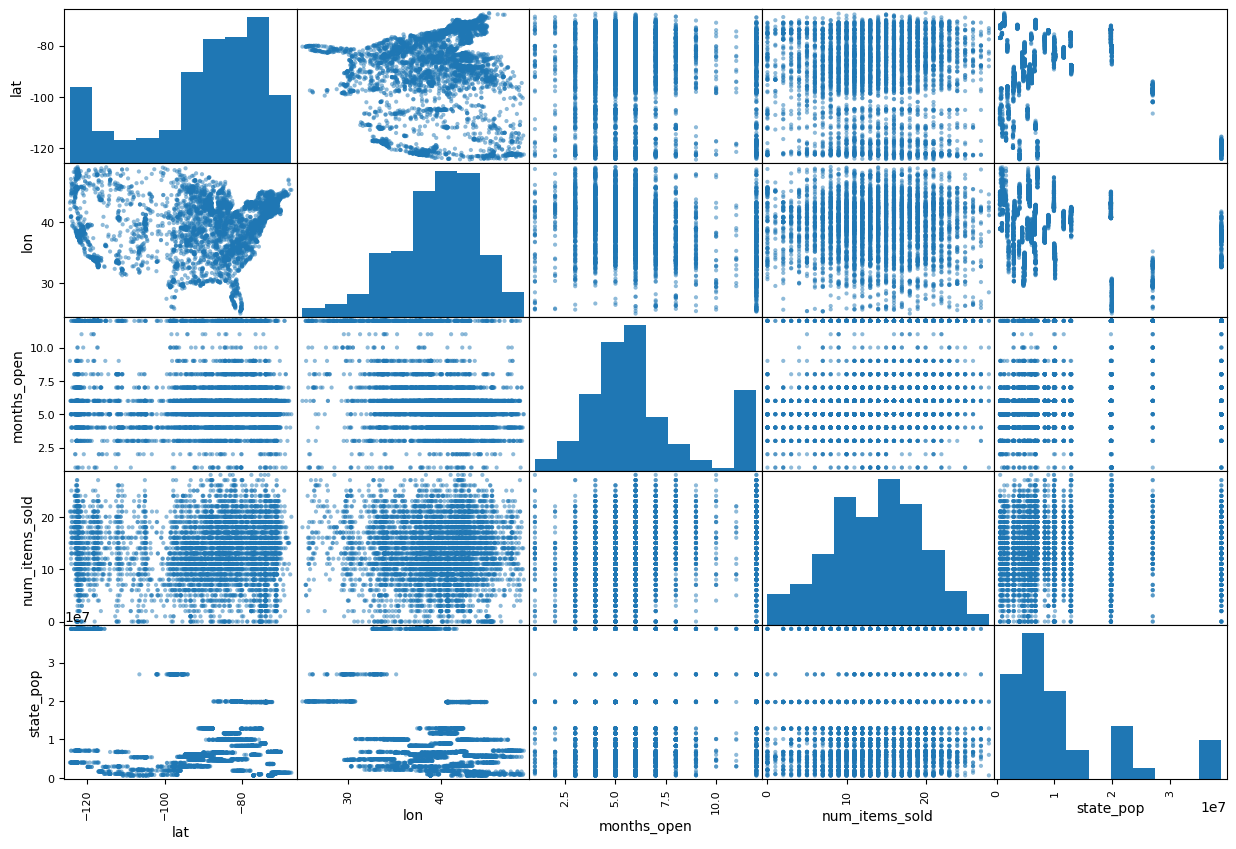

In [8]:
# Select just the numeric columns (excluding individual goods)
numeric_columns = ['lat', 'lon', 'months_open', 'num_items_sold', 'state_pop']

# Make a scatter matrix of numeric columns
pd.plotting.scatter_matrix(markets[numeric_columns],
                          # Make figure larget to show details
                          figsize=(15, 10),
                           # Lower point opacity to show overlap
                           alpha=0.5,
                          );

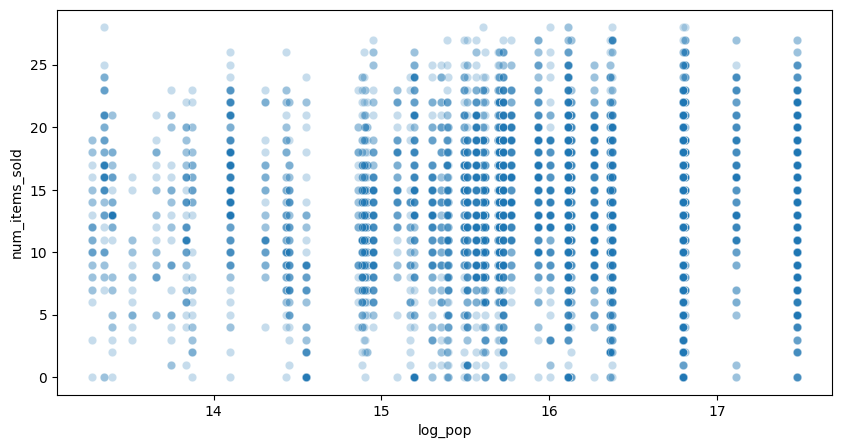

In [9]:
# Create a new logged population column
markets['log_pop'] = np.log(markets['state_pop'])

# Draw a scatterplot of log-population to # of items sold
sns.scatterplot(x='log_pop',
                y='num_items_sold',
                # Reduce point opacity to show overlap
                alpha=0.25,
                data=markets
               );

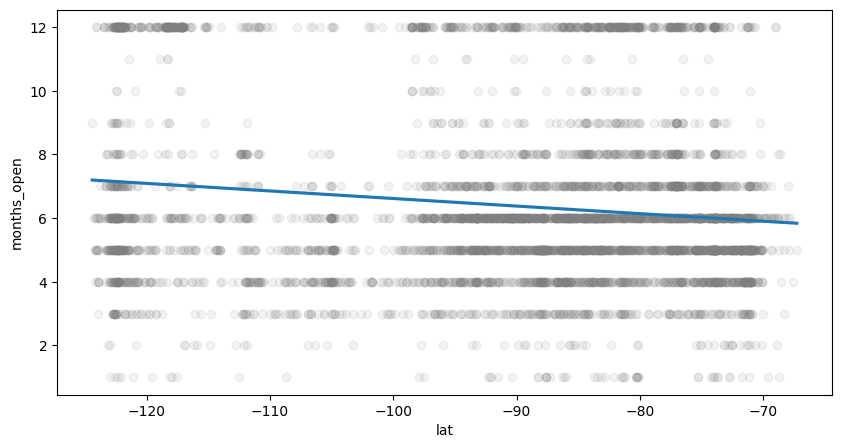

In [10]:
sns.regplot(x='lat',
            y='months_open',
            # Set scatter point opacity & color
           scatter_kws={'alpha':0.1, 'color':'gray'},
           # Disable confidence band
           ci=False,
           data=markets);

In [11]:
markets_and_pop = (markets
    .groupby('state', as_index = False)
    .agg({
       'name': lambda d: np.log(len(d)),
       'state_pop': lambda d: np.log(d.iloc[0]) })
    .rename(columns = {
        'name': 'log_markets', 
        'state_pop': 'log_pop' }))

In [21]:
# g = sns.regplot(
#     "log_markets", "log_pop", 
#     ci = False,
#     # Shrink scatter plot points
#     scatter_kws = {'s':2},
#     data = markets_and_pop)

# # Iterate over the rows of the data
# for _, row in markets_and_pop.iterrows():
#     state, _, _, log_markets, log_pop = row
#     # Place annotation and reduce size for clarity
#     g.annotate(state, (log_markets,log_pop), size = 10)

# plt.show()

TypeError: regplot() got multiple values for argument 'data'

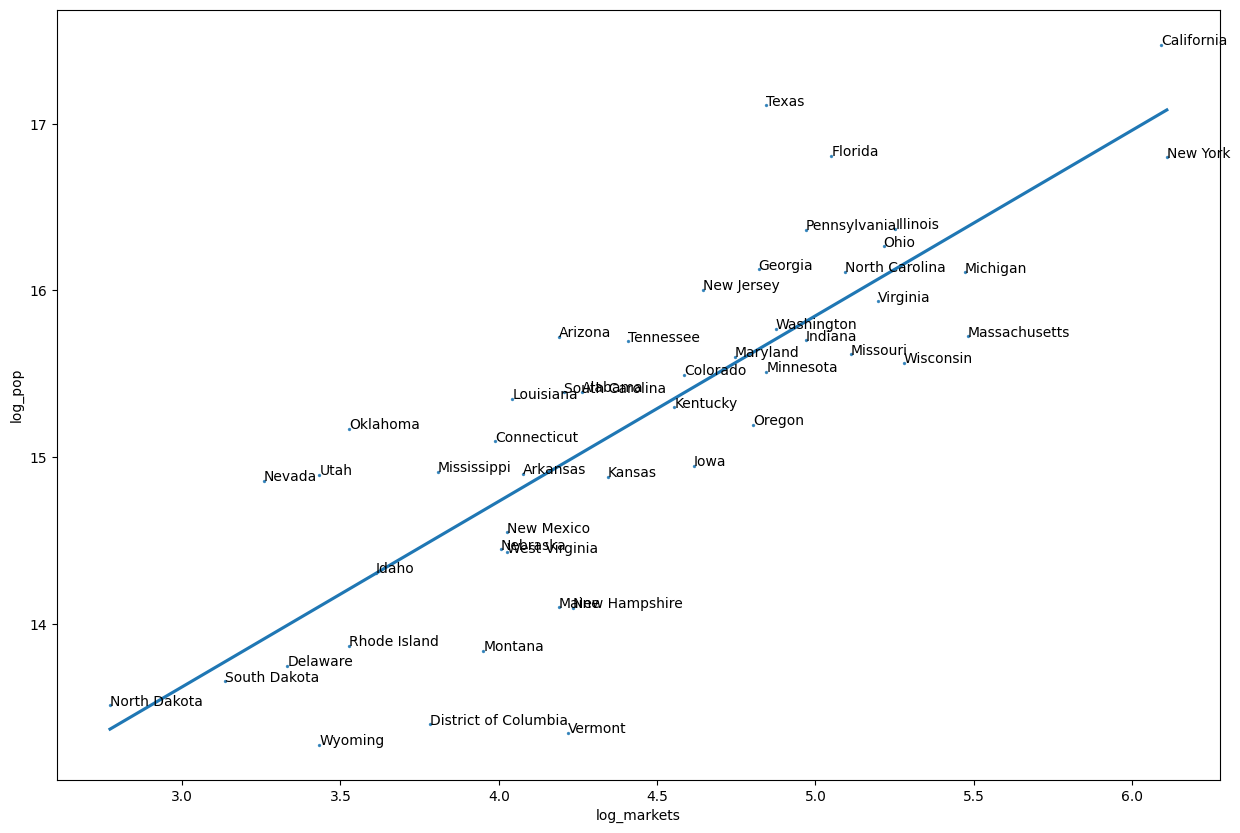

In [22]:
fig, ax = plt.subplots(figsize=(15, 10));
g = sns.regplot(
    x="log_markets",y="log_pop", 
    ci = False,
    # Shrink scatter plot points
    scatter_kws = {'s':2},
    data = markets_and_pop,
    ax=ax
)

# Iterate over the rows of the data
for _, row in markets_and_pop.iterrows():
    state, log_markets, log_pop = row
    # Place annotation and reduce size for clarity
    g.annotate(state, (log_markets, log_pop), size=10);

In [14]:
goods_by_state = pd.read_csv('.//goods_by_state.csv', index_col=0)

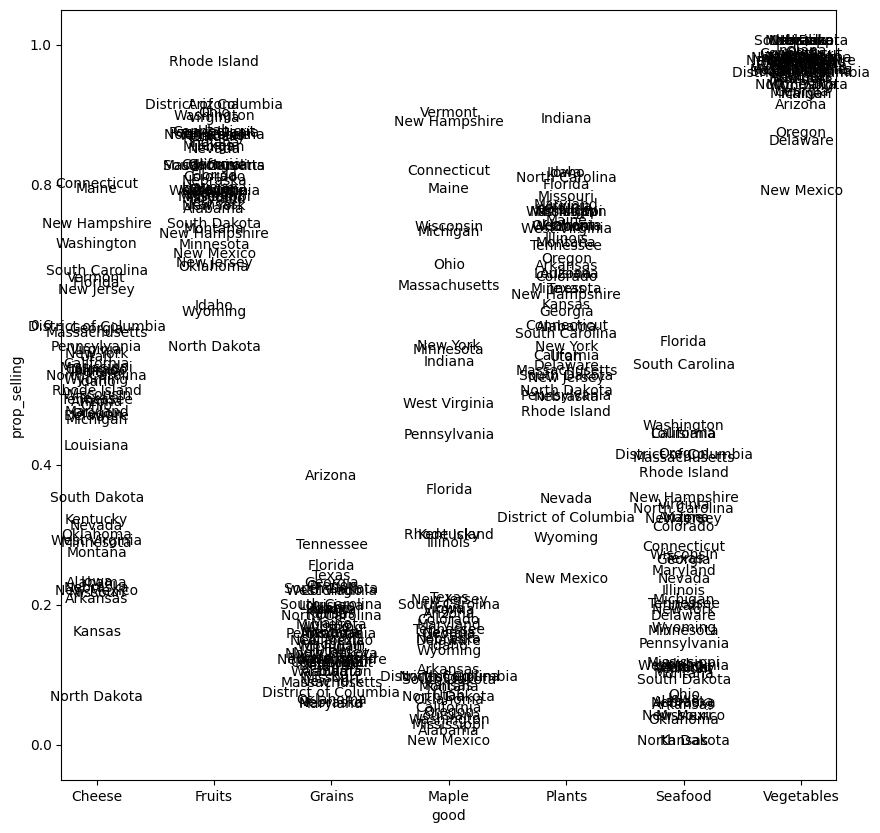

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
# Subset goods to interting ones
to_plot = ['Cheese', 'Maple', 'Fruits', 'Grains', 'Seafood', 'Plants', 'Vegetables']
goods_by_state_small = goods_by_state.query('good in ' + str(to_plot))

g = sns.scatterplot(x='good',y='prop_selling', data = goods_by_state_small,
                    # Hide scatter points by shrinking to nothing
                    s = 0, ax=ax)

for _,row in goods_by_state_small.iterrows():
    g.annotate(row['state'], (row['good'], row['prop_selling']), 
             # Center annotation on axis
             ha = 'center', 
             size = 10)

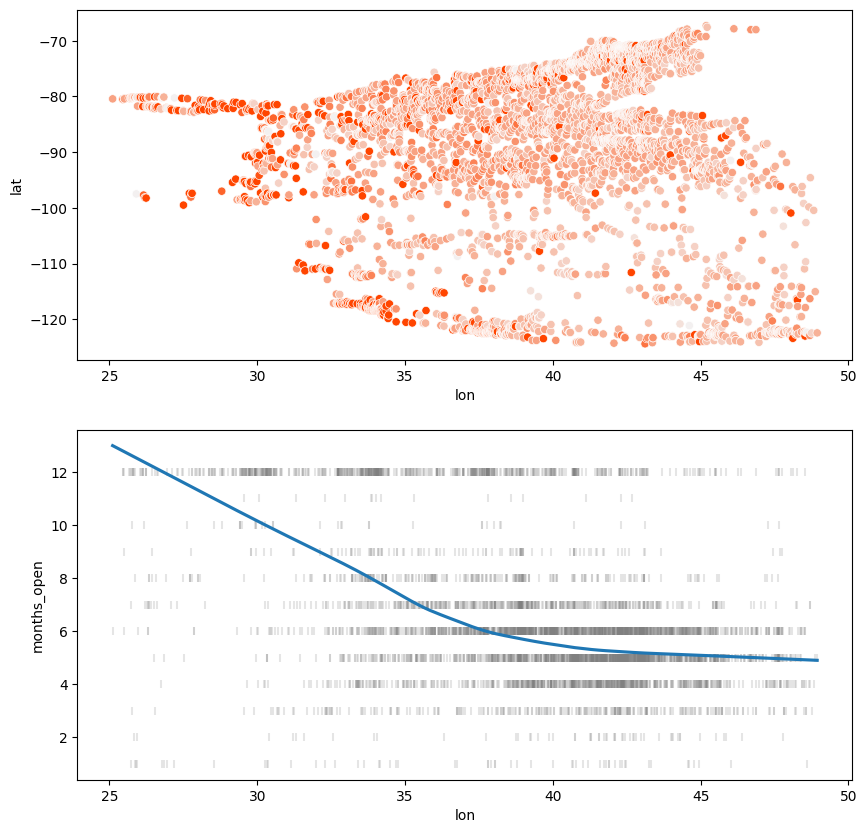

In [18]:
# Setup two stacked plots
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Draw location scatter plot on first plot
sns.scatterplot(x="lon", y="lat", hue="months_open",
               palette=sns.light_palette("orangered", n_colors=12),
               legend=False, data=markets,
               ax=ax1);

# Plot a regression plot on second plot
sns.regplot(x="lon", y="months_open",
           scatter_kws={'alpha':0.2, 'color':'gray', 'marker': '|'},
           lowess=True,
           marker='|', data=markets,
           ax=ax2);

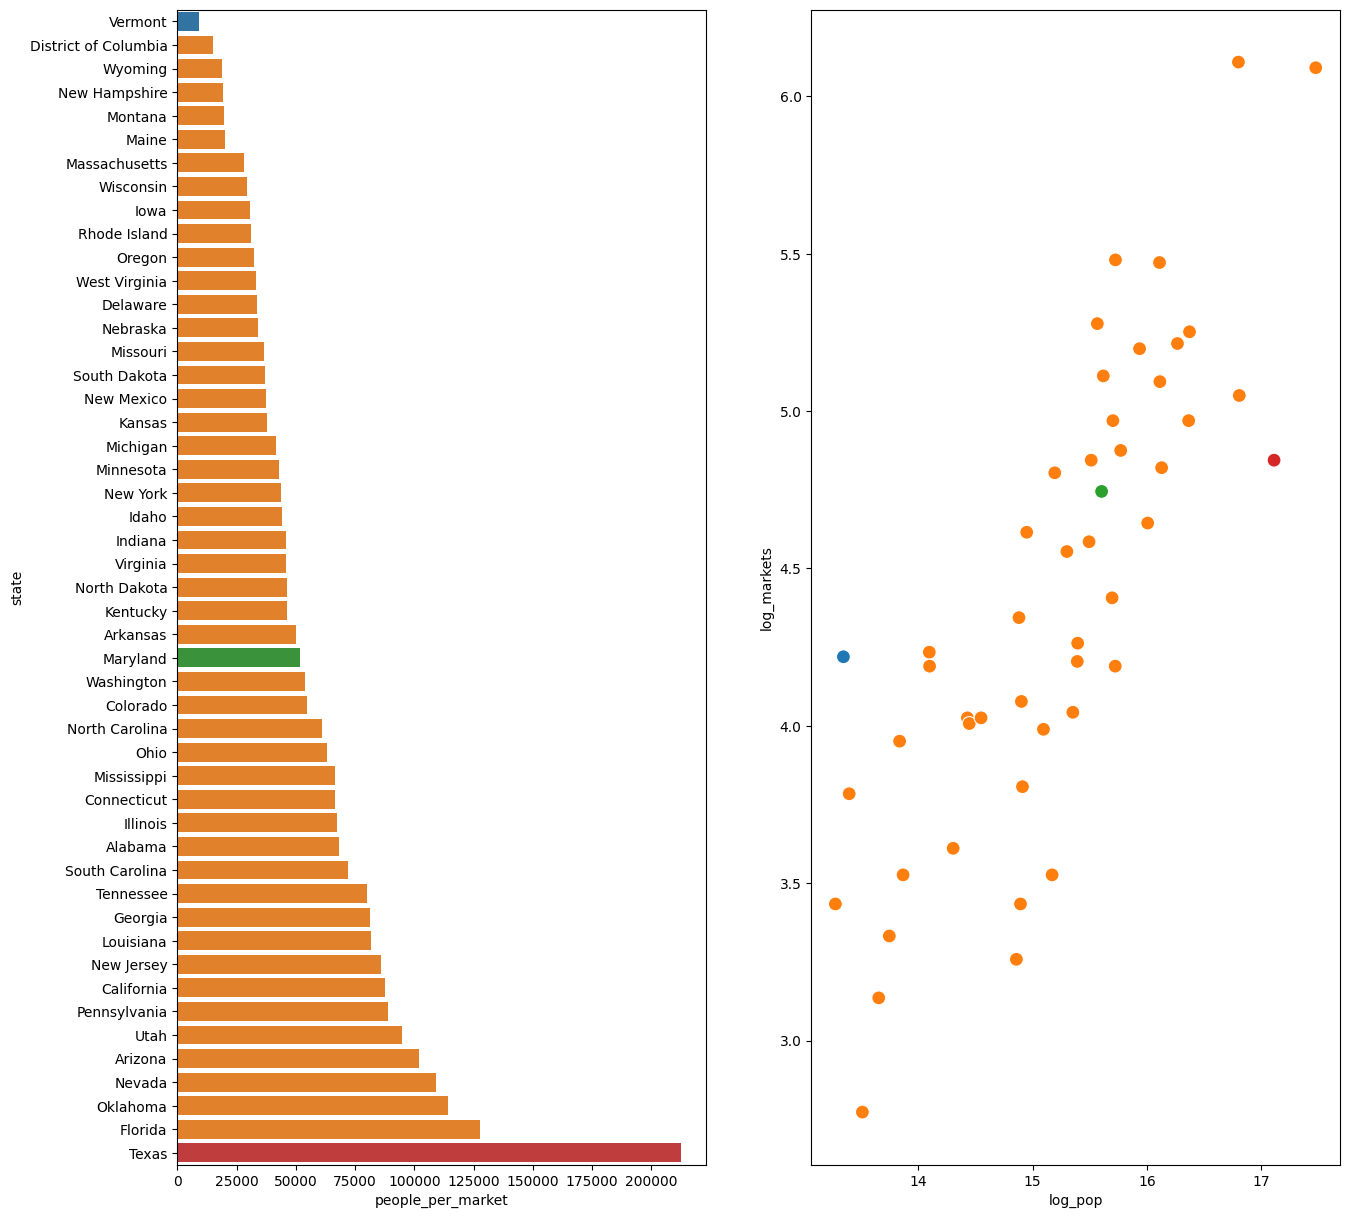

In [20]:
markets_by_state = pd.read_csv('.//markets_by_state.csv', index_col=0)
# Set up two side-by-side plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))

# Map the column for selected states to the bar color
sns.barplot(x='people_per_market', y='state', hue='is_selected',
           # Disable dodge so bars are full size
           dodge=False,
           data=markets_by_state, ax=ax1);

# Map selected states to point color
sns.scatterplot(x='log_pop', y='log_markets', hue='is_selected',
               data=markets_by_state, ax=ax2, s=100);

# Remove the legend for both plots
ax1.legend_.remove()
ax2.legend_.remove()

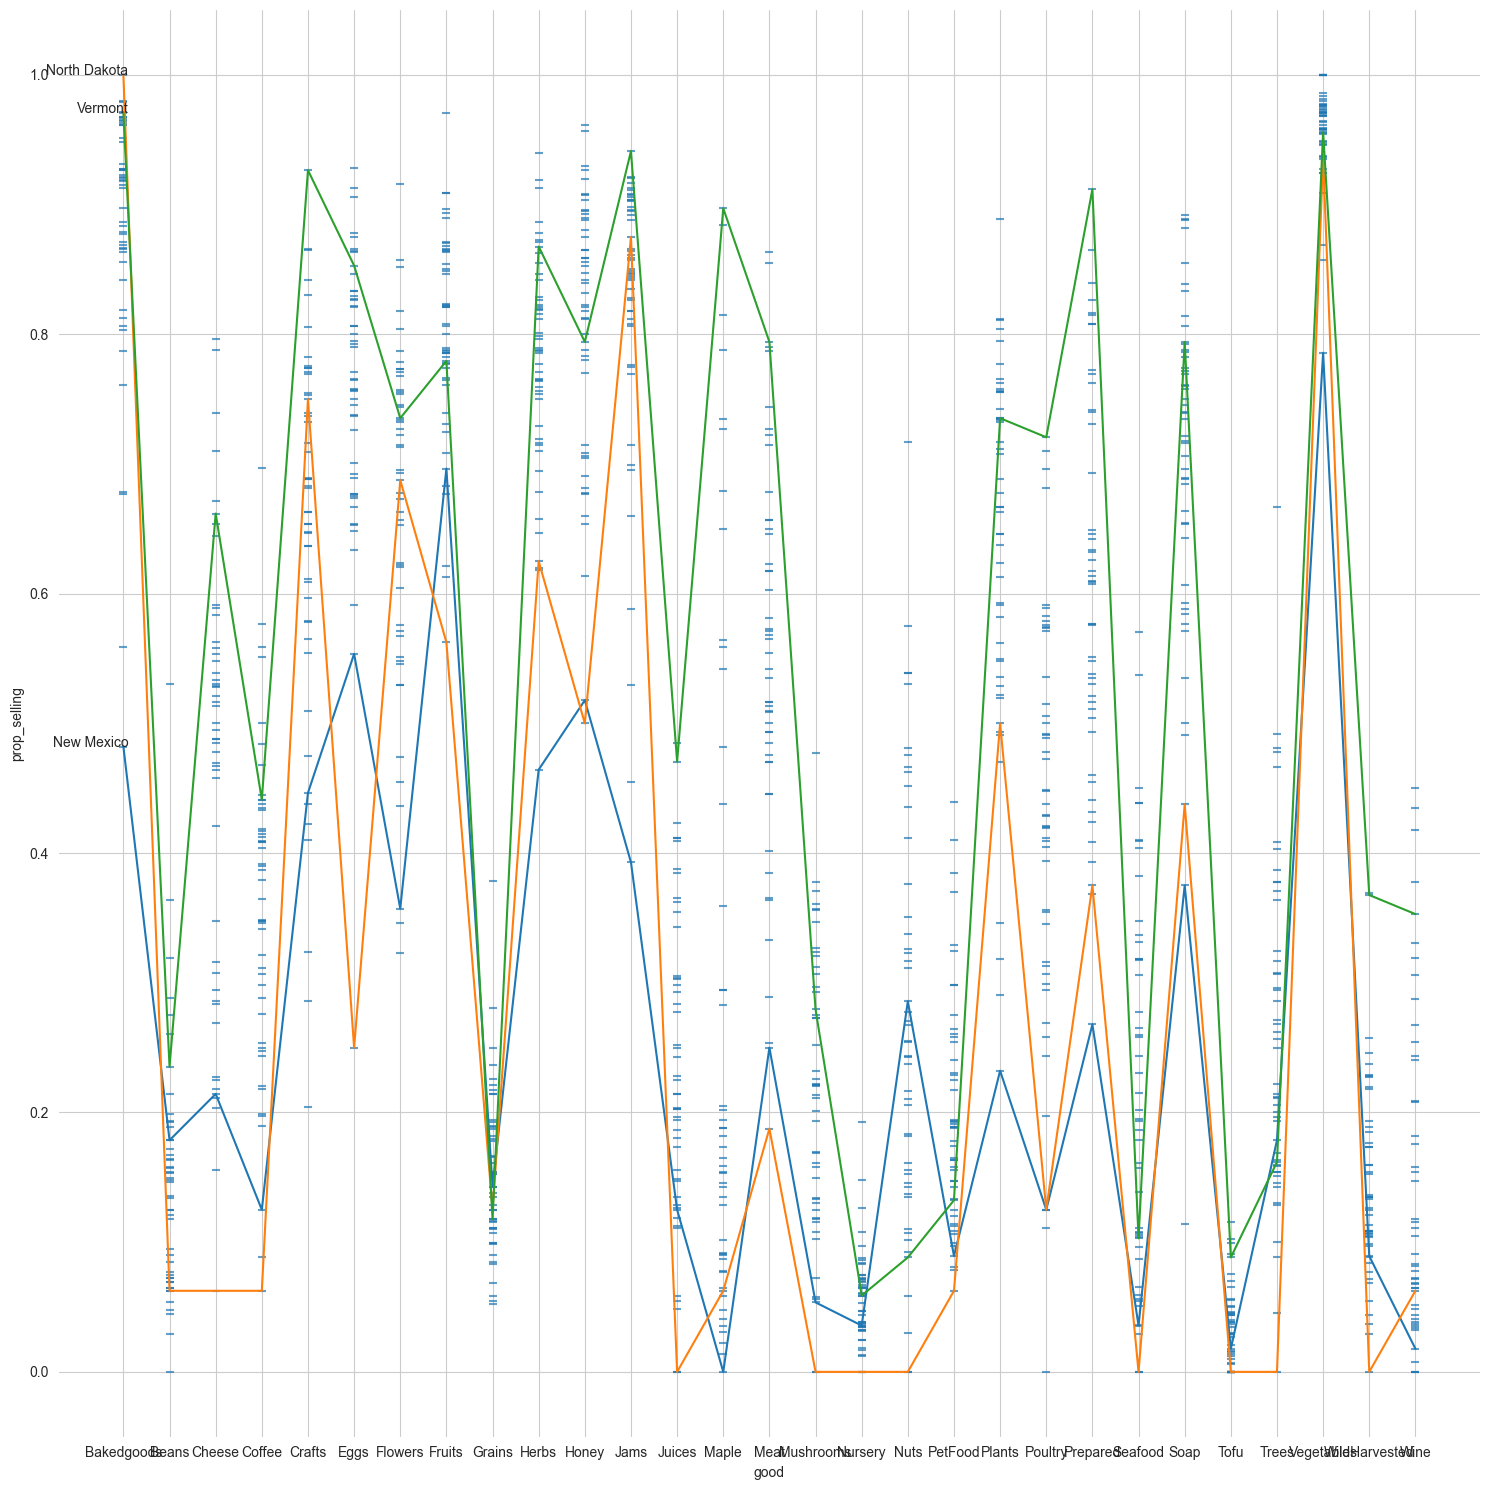

In [26]:
fig, ax = plt.subplots(figsize=(15, 15))

# Set background to white with grid
sns.set_style('whitegrid')

plt.scatter('good', 'prop_selling', marker='_', alpha=0.7, data= goods_by_state);

# Draw lines across goods for highlighted states
highlighted = goods_by_state.query("state in ['New Mexico', 'North Dakota', 'Vermont']")
sns.lineplot(x='good', y='prop_selling', hue='state', data=highlighted, legend=False, ax=ax);

# Draw state name at end of lines
last_rows = highlighted.groupby('state', as_index=False).agg('first')
for _, row in last_rows.iterrows():
    plt.annotate(row['state'], (row['good'], row['prop_selling']),
                ha='right', xytext=(5, 0), textcoords='offset pixels')
    
# Remove all borders
sns.despine(left=True, bottom=True);
plt.tight_layout();

In [28]:
markets_by_month = pd.read_csv('.//markets_by_month.csv', index_col=0)
state_by_lat = pd.Index(['North Dakota', 'Washington', 'Montana', 'Minnesota', 'Oregon', 'Idaho', 'Maine', 'South Dakota', 'Vermont', 'Wisconsin', 'Michigan', 'New Hampshire', 'Wyoming', 'Massachusetts', 'New York',
       'Iowa', 'Rhode Island', 'Connecticut', 'Nebraska', 'Illinois', 'Ohio', 'New Jersey', 'Pennsylvania', 'Indiana', 'Utah', 'Colorado', 'Delaware', 'Maryland', 'West Virginia',
       'District of Columbia', 'Kansas', 'Nevada', 'Missouri', 'Virginia', 'Kentucky', 'California', 'Tennessee', 'Oklahoma', 'North Carolina', 'Arkansas', 'New Mexico', 'South Carolina', 'Georgia',
       'Arizona', 'Alabama', 'Mississippi', 'Texas', 'Louisiana', 'Florida'], name='← Latitude')

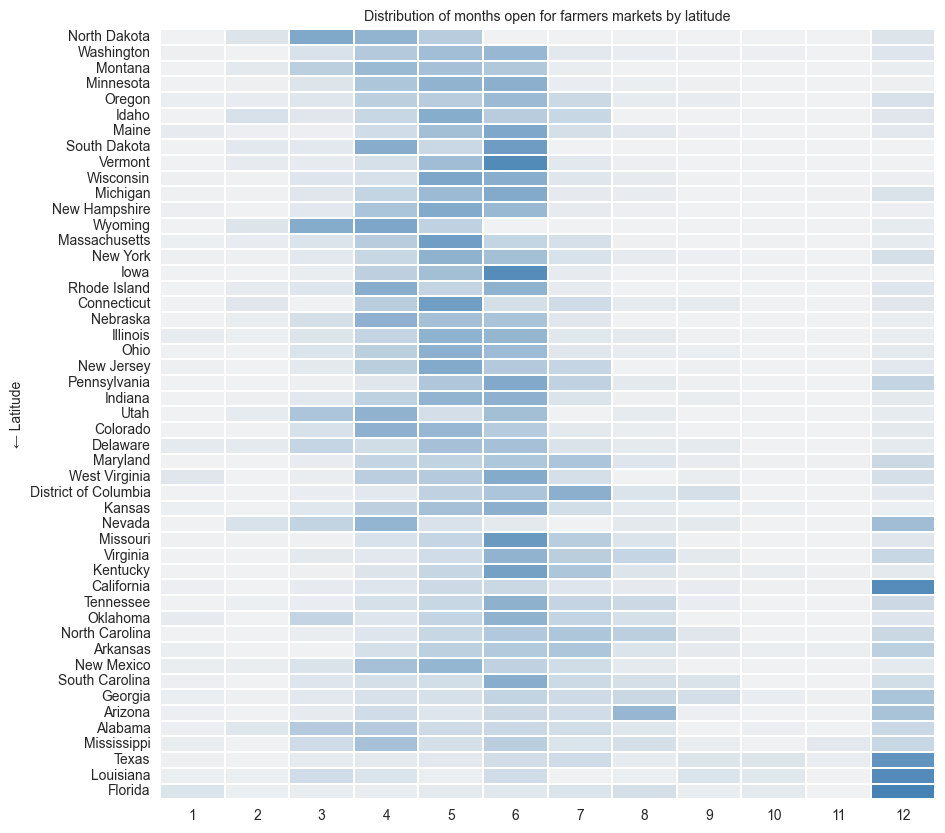

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))
# Decrease font size so state names are less crowded
sns.set(font_scale = 0.85)

# Switch to an appropriate color palette
blue_pal = sns.light_palette("steelblue", as_cmap = True)

# Order states by latitude
g = sns.heatmap(markets_by_month.reindex(state_by_lat), 
            # Add gaps between cells
            linewidths = 0.1, 
            # Set new palette and remove color bar 
            cmap = blue_pal, cbar = False,
            yticklabels = True, ax=ax);

# Rotate y-axis ticks 
g.set_yticklabels(g.get_yticklabels(), rotation = 0);
plt.title('Distribution of months open for farmers markets by latitude');

In [30]:
markets_by_state2 = pd.read_csv('./markets_by_state2.csv', index_col=0)

In [31]:
state_colors = ['steelblue', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray',
 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray',
 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray',
 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray',
 'gray', 'orangered']

tx_message =  'Texas has a large population\nand relatively few farmers\nmarkets.'

C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_56560\2287992027.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='people_per_market', y='state', palette = state_colors,


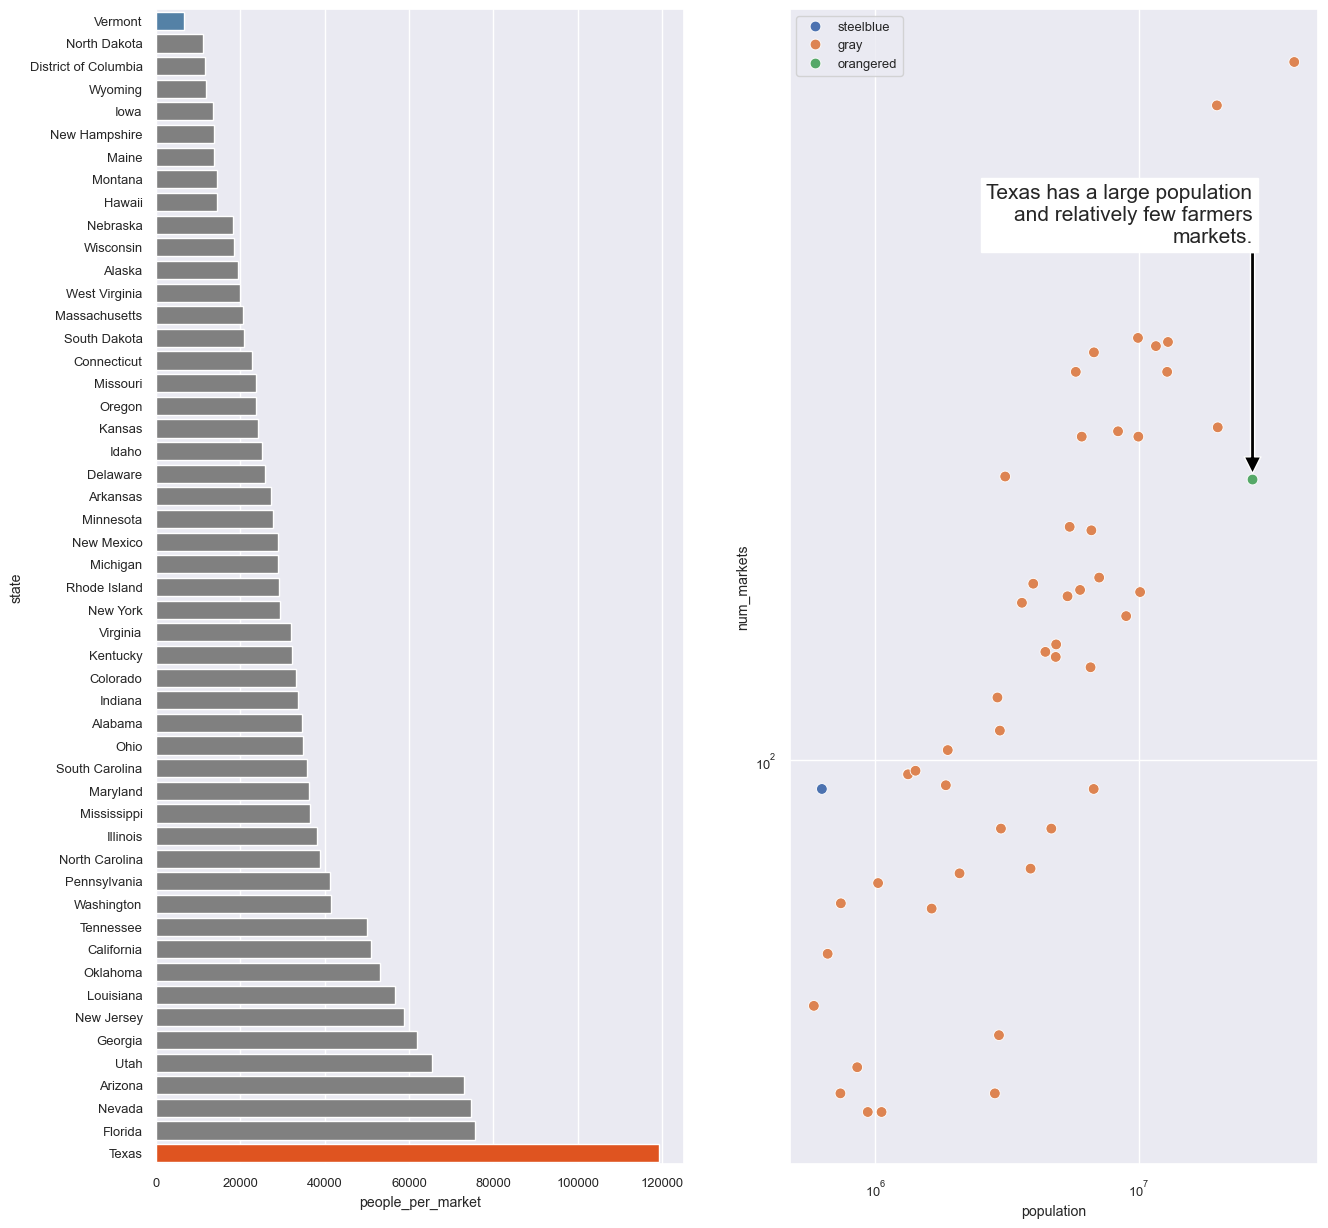

In [35]:
# Set up two side-by-side plots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))

# Draw barplot w/ colors mapped to state_colors vector
sns.barplot(x='people_per_market', y='state', palette = state_colors,
            data = markets_by_state2, ax = ax1)

# Map state colors vector to the scatterplot as well
p = sns.scatterplot(x='population', y='num_markets', hue = state_colors,
                    data = markets_by_state2, s = 60, ax = ax2)

# Log the x and y scales of our scatter plot so it's easier to read
ax2.set(xscale = "log", yscale = 'log')

# Increase annotation text size for legibility
ax2.annotate(tx_message, xy = (26956958,230), 
             xytext = (26956958, 450),ha = 'right', 
             size = 15, backgroundcolor = 'white',
             arrowprops = {'facecolor':'black', 'width': 3})
sns.set_style('whitegrid')

In [33]:
# Draw barplot w/ colors mapped to state_colors vector
sns.barplot('people_per_market', 'state', palette = state_colors,
            data = markets_by_state, ax = ax1)

# Map state colors vector to the scatterplot as well
p = sns.scatterplot('population', 'num_markets', c = state_colors,
                    data = markets_by_state, s = 60, ax = ax2)

# Log the x and y scales of our scatter plot so it's easier to read
ax2.set(xscale = "log", yscale = 'log')

# Increase annotation text size for legibility
ax2.annotate(tx_message, xy = (26956958,230), 
             xytext = (26956958, 450),ha = 'right', 
             size = 15, backgroundcolor = 'white',
             arrowprops = {'facecolor':'black', 'width': 3})
sns.set_style('whitegrid')
plt.show() 

TypeError: barplot() got multiple values for argument 'data'